In [17]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [18]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.3/78.2 GB disk)


In [19]:
from ultralytics import YOLO

from IPython.display import display, Image

In [20]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kFZUl3uLBwjb3RcIEM3K")
project = rf.workspace("dr-naman-goyal").project("ricebags")
dataset = project.version(3).download("yolov8")
# dataset = '/content/RiceBags-3'

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to RiceBags-3 in yolov8:: 100%|██████████| 40/40 [00:00<00:00, 3249.89it/s]


## Custom Training

In [11]:
print(dataset)

/content/RiceBags-3


In [25]:
%cp -r /content/datasets/RiceBags-3 /content/

In [39]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=55 imgsz=640 plots=True
# /content/RiceBags-1/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/RiceBags-3/data.yaml, epochs=55, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpli

In [41]:
!ls {HOME}/runs/detect/train16/

args.yaml					    R_curve.png       train_batch45.jpg
confusion_matrix.png				    results.csv       train_batch46.jpg
events.out.tfevents.1698344511.a725afffdc2c.7280.0  results.png       train_batch47.jpg
F1_curve.png					    train_batch0.jpg  val_batch0_labels.jpg
P_curve.png					    train_batch1.jpg  val_batch0_pred.jpg
PR_curve.png					    train_batch2.jpg  weights


/content


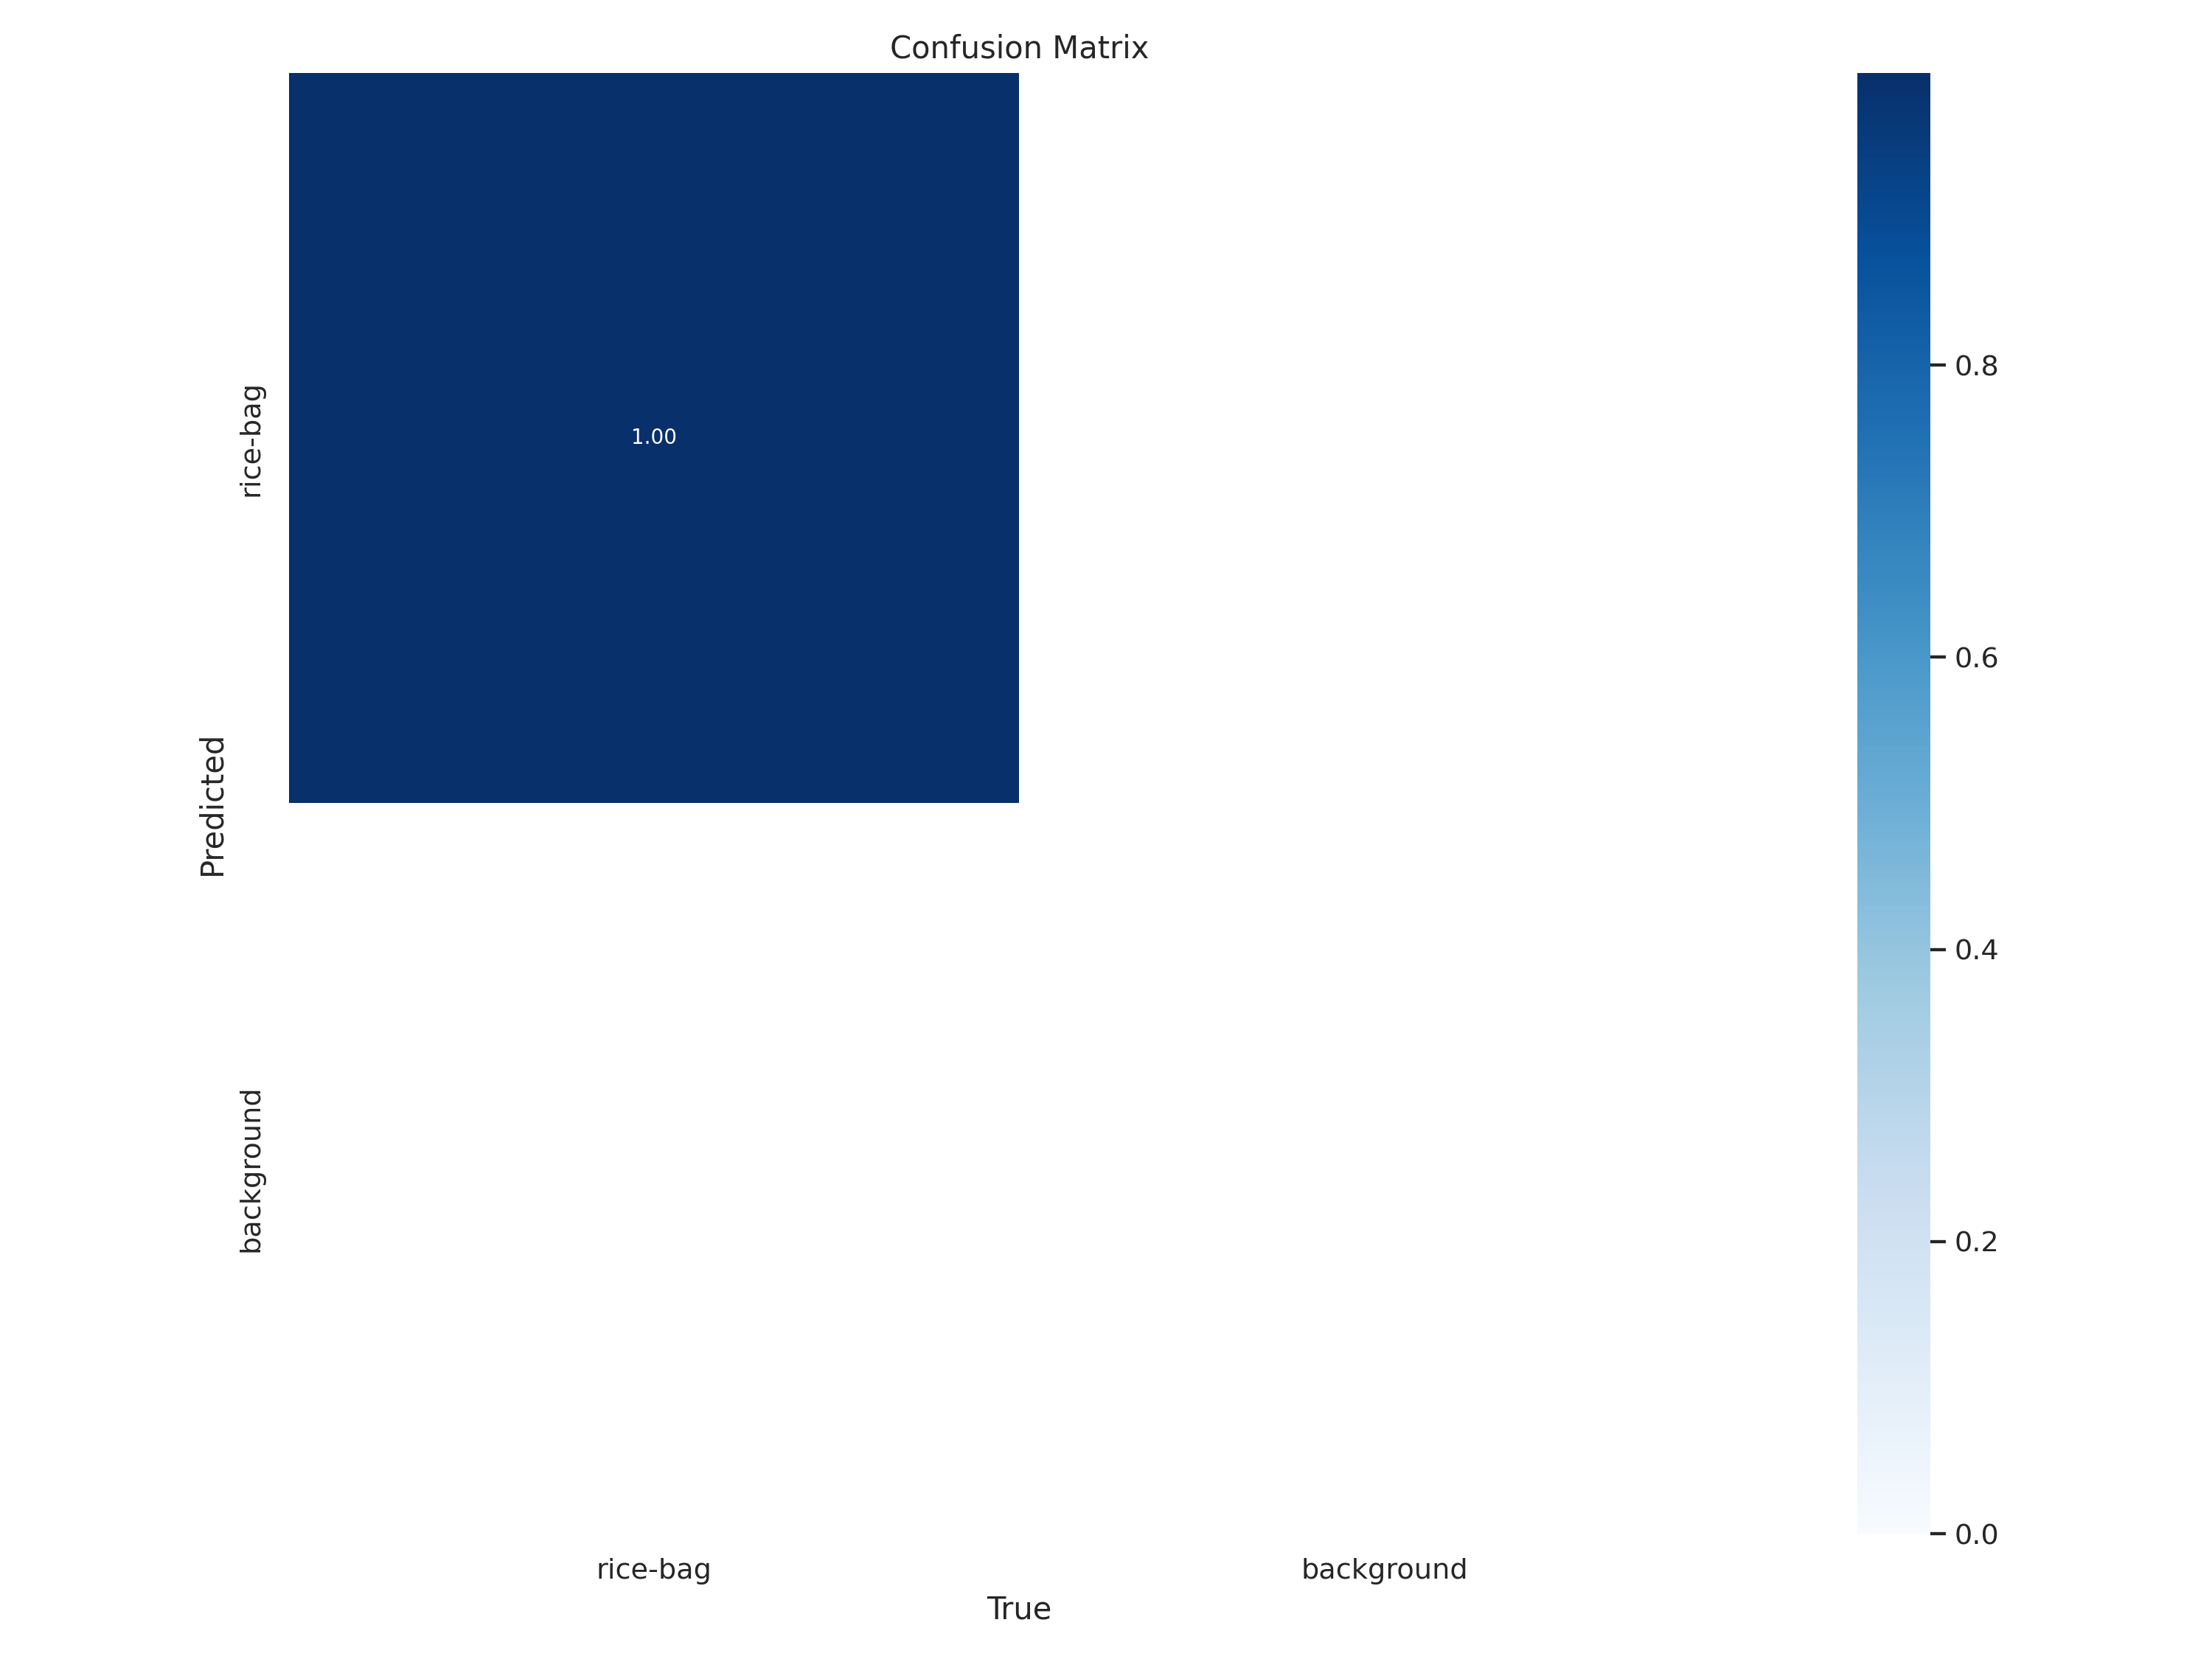

In [42]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train16/confusion_matrix.png', width=640)

/content


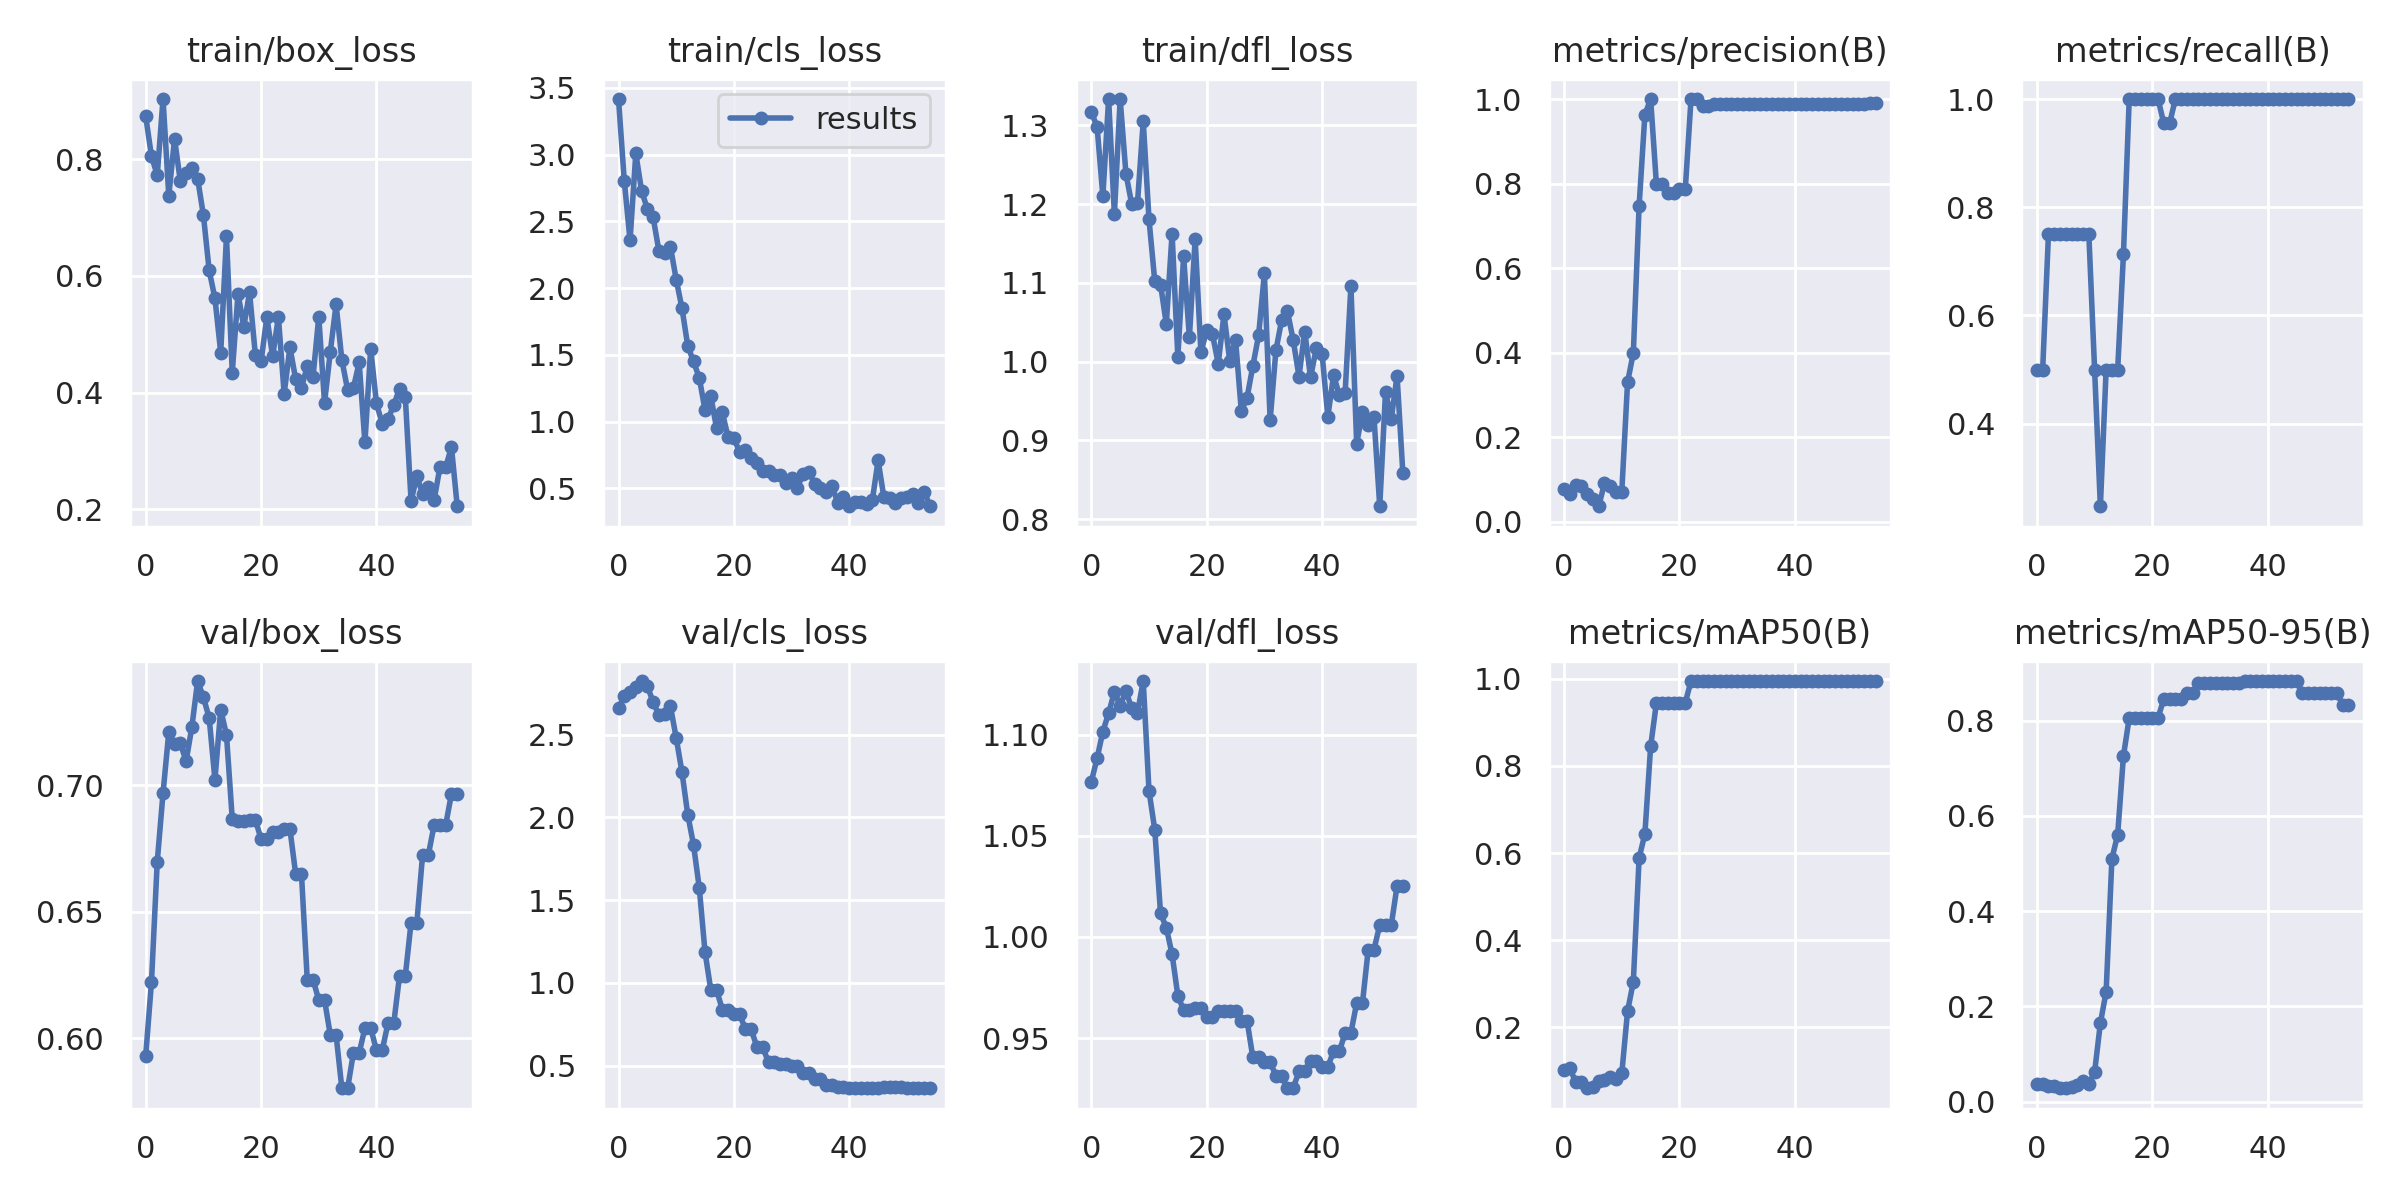

In [43]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train16/results.png', width=600)

/content


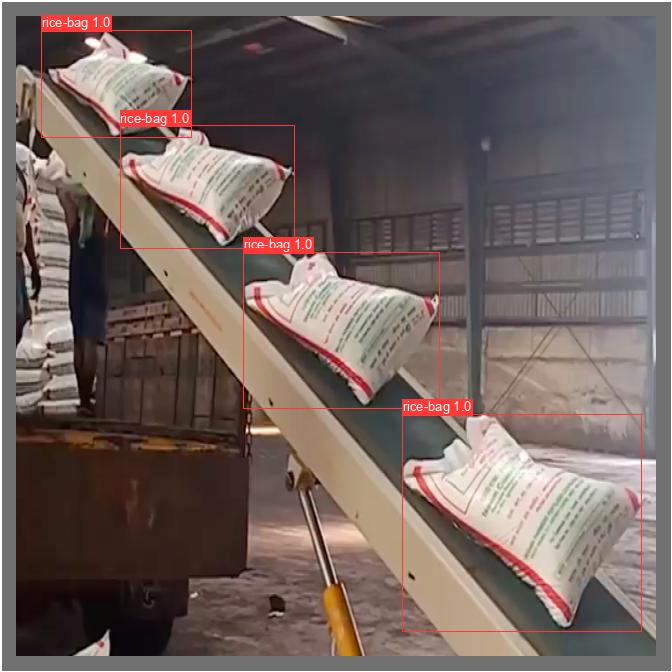

In [44]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train16/val_batch0_pred.jpg', width=600)

In [45]:
!zip -r weights.zip runs/detect/train16/weights/

  adding: runs/detect/train16/weights/ (stored 0%)
  adding: runs/detect/train16/weights/last.pt (deflated 8%)
  adding: runs/detect/train16/weights/best.pt (deflated 8%)


## Validate Custom Model

In [46]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train16/weights/best.pt data={dataset.location}/data.yaml

/content
2023-10-26 18:25:05.674715: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-26 18:25:05.674779: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-26 18:25:05.674820: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-26 18:25:05.686699: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-26 18:25:07.623263: W ten

## Inference with Custom Model

In [47]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train16/weights/best.pt conf=0.55 source={dataset.location}/test/images save=True

/content
2023-10-26 18:25:26.746913: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-26 18:25:26.746972: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-26 18:25:26.747008: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-26 18:25:26.754930: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-26 18:25:28.003711: W ten

**NOTE:** Let's take a look at few results.

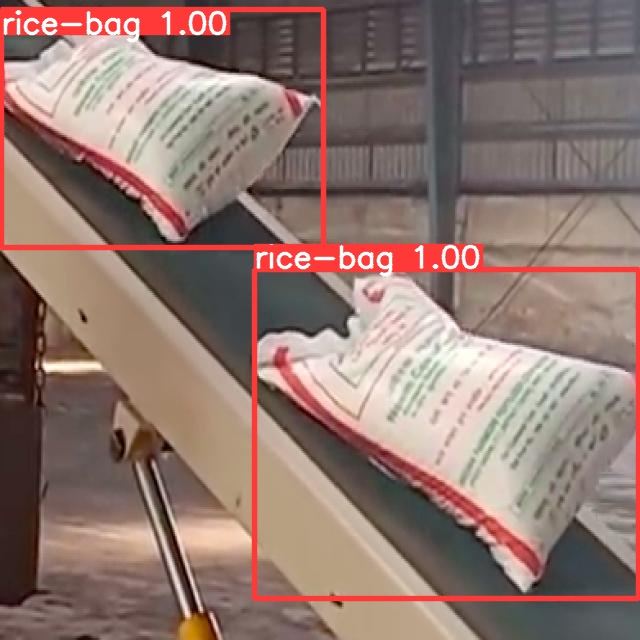

In [48]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")